In [1]:
import matplotlib.pyplot as plt
from scipy.stats import chi2
import numpy as np
import iminuit
plt.rcParams['text.usetex'] = True

In [2]:
VtbVts = -0.041434391559915976+0.0007642055926347639j
xSM = -12.64
CLSM = xSM*VtbVts

In [3]:
def BRKnunu(CL, CR):
    Aplus_BK =5.66e-6
    return Aplus_BK*(np.abs(CLSM+CL+CR)**2+2*np.abs(CLSM)**2)

def BRKsnunu(CL, CR):
    Aplus_BKs = 2.0e-6
    Aminus_BKs = 8.88e-6
    return Aplus_BKs*(np.abs(CLSM+CL+CR)**2+2*np.abs(CLSM)**2)+Aminus_BKs*(np.abs(CLSM+CL-CR)**2+2*np.abs(CLSM)**2)

In [4]:
xx, yy = np.meshgrid(np.linspace(-2, 2, 200), np.linspace(-2, 2, 200))

In [5]:
chi2_BKnunu = np.zeros([200,200])
for i in range(200):
    for j in range(200):
        chi2_BKnunu[i,j] = (BRKnunu(xx[i, j], yy[i, j]) - 2.3e-5)**2/0.7e-5**2


chi2_BKsnunu = np.zeros([200, 200])
for i in range(200):
    for j in range(200):
        chi2_BKsnunu[i,j] = BRKsnunu(xx[i, j], yy[i, j])**2/1.8e-5**2

chi2_tot = np.zeros([200, 200])
for i in range(200):
    for j in range(200):
        chi2_tot[i,j] = BRKsnunu(xx[i, j], yy[i, j])**2/1.8e-5**2 + (BRKnunu(xx[i, j], yy[i, j]) - 2.3e-5)**2/0.7e-5**2


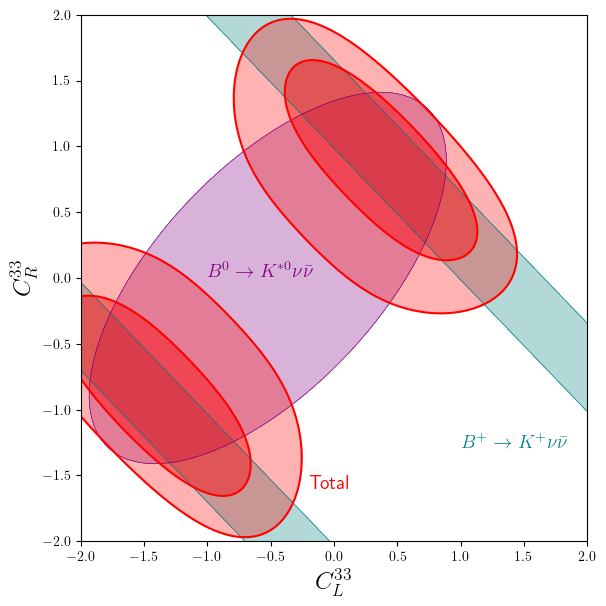

In [6]:
plt.figure(figsize=(6,6))

plt.contour(xx, yy, chi2_BKnunu, levels=[1], colors='teal', linewidths=0.5)
plt.contourf(xx, yy, chi2_BKnunu, levels=[0, 1], colors='teal', alpha=0.3)


plt.contour(xx, yy, chi2_BKsnunu, levels=[1+np.min(chi2_BKsnunu)], colors='purple', linewidths=0.5)
plt.contourf(xx, yy, chi2_BKsnunu, levels=[0,1+np.min(chi2_BKsnunu)], colors='purple', alpha=[0.3])

plt.contour(xx, yy, chi2_tot, levels=[chi2.isf(1-0.68, 2)+np.min(chi2_tot), chi2.isf(1-0.954, 2)+np.min(chi2_tot)], colors='red')
plt.contourf(xx, yy, chi2_tot, levels=[np.min(chi2_tot), chi2.isf(1-0.68, 2)+np.min(chi2_tot), chi2.isf(1-0.954, 2)+np.min(chi2_tot)], colors='red', alpha=[0.6, 0.3])

plt.annotate(r'$B^+\to K^+ \nu\bar{\nu}$', (1.0, -1.3), color='teal', fontsize=14)
plt.annotate(r'$B^0\to K^{*0} \nu\bar{\nu}$', (-1.0, 0), color='purple', fontsize=14)
plt.annotate('Total', (-0.2, -1.60), color='red', fontsize=14)


plt.xlabel(r'$C_L^{33}$', fontsize=18)
plt.ylabel(r'$C_R^{33}$', fontsize=18)

plt.tight_layout(pad=0.5)
plt.savefig('BKnunu.pdf')

In [7]:
def chi2_fit(CL, CR):
    return BRKsnunu(CL, CR)**2/1.8e-5**2 + (BRKnunu(CL, CR) - 2.3e-5)**2/0.7e-5**2

In [8]:
def err_BRKnunu(CL, CR, err_CL, err_CR, cov):
    Aplus_BK =5.66e-6
    return 2*Aplus_BK*np.abs(CLSM+CL+CR)*np.sqrt(err_CL**2+err_CR**2+2*cov)

def err_BRKsnunu(CL, CR, err_CL, err_CR, cov):
    Aplus_BKs = 2.0e-6
    Aminus_BKs = 8.88e-6
    partial_CL = 2*Aplus_BKs*np.abs(CLSM+CL+CR)+2*Aminus_BKs*np.abs(CLSM+CL-CR)
    partial_CR = 2*Aplus_BKs*np.abs(CLSM+CL+CR)-2*Aminus_BKs*np.abs(CLSM+CL-CR)
    return np.sqrt(partial_CL**2*err_CL**2+partial_CR**2*err_CR**2+2*cov*partial_CL*partial_CR)

In [9]:
m1 = iminuit.Minuit(chi2_fit, CL=-1.5, CR=-1.0)

In [10]:
m1.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.512                      │              Nfcn = 34               │
│ EDM = 2.79e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ CL   │   -1.4    │    0.6    │            │            │         │         │       │
│ 1 │ CR   │   -0.9    │    0.6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────┐
│    │    CL    CR │
├────┼─────────────┤
│ CL │ 0.385  -0.3 │
│ CR │  -0.3 0.384 │
└────┴─────────────┘

In [11]:
m1.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.512                      │              Nfcn = 44               │
│ EDM = 2.8e-09 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ CL   │   -1.4    │    0.6    │            │            │         │         │       │
│ 1 │ CR   │   -0.9    │    0.6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────┐
│    │    CL    CR │
├────┼─────────────┤
│ CL │ 0.384  -0.3 │
│ CR │  -0.3 0.384 │
└────┴─────────────┘

In [12]:
m1.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.512                      │              Nfcn = 164              │
│ EDM = 2.8e-09 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ CL   │   -1.4    │    0.6    │    -0.5    │    0.6     │         │         │       │
│ 1 │ CR   │   -0.9    │    0.6    │    -0.5    │    0.6     │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          CL           │          CR           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.5    │    0.6    │   -0.5    │    0.6    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬─────────────┐
│    │    CL    CR │
├────┼─────────────┤
│ CL │ 0.384  -0.3 │
│ CR │  -0.3 0.384 │
└────┴─────────────┘

In [13]:
m1.values

<ValueView CL=-1.4448831972714602 CR=-0.9212076735836084>

In [14]:
m1.errors

<ErrorView CL=0.6199753564765352 CR=0.6199725195233701>

In [15]:
BRKnunu(*m1.values)

2.231827766359173e-05

In [16]:
err_BRKnunu( *m1.values, *m1.errors, m1.covariance[0,1])

6.935436328975332e-06

In [17]:
BRKsnunu(*m1.values)

1.276026180357825e-05

In [18]:
err_BRKsnunu(*m1.values, *m1.errors, m1.covariance[0,1])

2.459239240757072e-06

In [19]:
m2 = iminuit.Minuit(chi2_fit, CL=0.5, CR=1.0)

In [20]:
m2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.512                      │              Nfcn = 36               │
│ EDM = 8.45e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ CL   │    0.4    │    0.6    │            │            │         │         │       │
│ 1 │ CR   │    0.9    │    0.6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────┐
│    │    CL    CR │
├────┼─────────────┤
│ CL │ 0.385  -0.3 │
│ CR │  -0.3 0.385 │
└────┴─────────────┘

In [21]:
m2.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.512                      │              Nfcn = 46               │
│ EDM = 8.44e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ CL   │    0.4    │    0.6    │            │            │         │         │       │
│ 1 │ CR   │    0.9    │    0.6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────┐
│    │    CL    CR │
├────┼─────────────┤
│ CL │ 0.386  -0.3 │
│ CR │  -0.3 0.386 │
└────┴─────────────┘

In [22]:
m2.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.512                      │              Nfcn = 166              │
│ EDM = 8.44e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ CL   │    0.4    │    0.6    │    -0.6    │    0.5     │         │         │       │
│ 1 │ CR   │    0.9    │    0.6    │    -0.6    │    0.5     │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          CL           │          CR           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.6    │    0.5    │   -0.6    │    0.5    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬─────────────┐
│    │    CL    CR │
├────┼─────────────┤
│ CL │ 0.386  -0.3 │
│ CR │  -0.3 0.386 │
└────┴─────────────┘

In [23]:
m2.values

<ValueView CL=0.39744431634732236 CR=0.9211857073818857>

In [24]:
m2.errors

<ErrorView CL=0.6211000653485141 CR=0.621099515156774>

In [25]:
BRKnunu(*m2.values)

2.2318289582705406e-05

In [26]:
err_BRKnunu(*m2.values, *m2.errors, m2.covariance[0,1])

6.934380527789828e-06

In [27]:
BRKsnunu(*m2.values)

1.2760265989248767e-05

In [28]:
err_BRKsnunu(*m2.values, *m2.errors, m2.covariance[0,1])

2.4588993886304104e-06

In [29]:
m3 = iminuit.Minuit(lambda CL: chi2_fit(CL, 0), CL=1)

In [30]:
m3.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.87                       │              Nfcn = 14               │
│ EDM = 7.23e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ CL   │   0.91    │   0.34    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────┐
│    │    CL │
├────┼───────┤
│ CL │ 0.118 │
└────┴───────┘

In [31]:
m3.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.87                       │              Nfcn = 19               │
│ EDM = 7.23e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ CL   │   0.91    │   0.34    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────┐
│    │    CL │
├────┼───────┤
│ CL │ 0.118 │
└────┴───────┘

In [32]:
m3.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.87                       │              Nfcn = 25               │
│ EDM = 7.23e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ CL   │   0.91    │   0.34    │   -0.40    │    0.31    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │          CL           │
├──────────┼───────────┬───────────┤
│  Error   │   -0.40   │   0.31    │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌────┬───────┐
│    │    CL │
├────┼───────┤
│ CL │ 0.118 │
└────┴───────┘

In [33]:
BRKnunu(m3.values[0], 0)

1.4802406934871474e-05

In [34]:
err_BRKnunu(m3.values[0], 0, m3.errors[0], 0, 0)

5.601014867980013e-06

In [35]:
BRKsnunu(m3.values[0],0)

2.845409672286248e-05

In [36]:
err_BRKsnunu(m3.values[0],0, m3.errors[0], 0, 0)

1.0766615152583489e-05

In [37]:
m4 = iminuit.Minuit(lambda CL: chi2_fit(CL, 0), CL=-1)

In [38]:
m4.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.87                       │              Nfcn = 29               │
│ EDM = 1.2e-10 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ CL   │   -1.96   │   0.34    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────┐
│    │    CL │
├────┼───────┤
│ CL │ 0.119 │
└────┴───────┘

In [39]:
m4.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.87                       │              Nfcn = 34               │
│ EDM = 1.2e-10 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ CL   │   -1.96   │   0.34    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────┐
│    │    CL │
├────┼───────┤
│ CL │ 0.119 │
└────┴───────┘

In [40]:
m4.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.87                       │              Nfcn = 40               │
│ EDM = 1.2e-10 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ CL   │   -1.96   │   0.35    │   -0.31    │    0.40    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │          CL           │
├──────────┼───────────┬───────────┤
│  Error   │   -0.31   │   0.40    │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌────┬───────┐
│    │    CL │
├────┼───────┤
│ CL │ 0.119 │
└────┴───────┘

In [41]:
BRKnunu(m4.values[0], 0)

1.4754762468066487e-05

In [42]:
err_BRKnunu(m4.values[0], 0, m4.errors[0], 0, 0)

5.606716519347622e-06

In [43]:
BRKsnunu(m4.values[0],0)

2.836251159939282e-05

In [44]:
err_BRKsnunu(m4.values[0],0, m4.errors[0], 0, 0)

1.0777575217403203e-05

In [45]:
import flavio

In [46]:
flavio.__version__

'2.3.3'

In [47]:
from wilson import Wilson

In [50]:
flavio.np_prediction('BR(B0->K*nunu)', Wilson({'CL_bsnutaunutau':-1.4/-0.08287, 'CR_bsnutaunutau':-1.0/-0.08287}, scale=4.8, basis='flavio', eft='WET'))

/home/jorge/.cache/pypoetry/virtualenvs/banomalies-ml-24-q3wM3yKA-py3.10/lib/python3.10/site-packages/wilson/classes.py:74: FutureWarning: Using the parameter 'delta' is deprecated. Please use 'gamma' instead. Support for using 'delta' will be removed in the future.
  warnings.warn("Using the parameter 'delta' is deprecated. "


1.3040674821147401e-05